# WELCOME to this guided project "Applying Image Convolution" at Coursera Labs! 😁 
#### This project course is part of "Tensorflow for AI" Series of project courses on Coursera.<br/><br/>

We will go through 5 tasks to implement our project:<br/><br/>
👉🏻**Task 1:** Introduction and Overview of the Project. <br/><br/>
👉🏻**Task 2:** Definition and Understanding of Convolutions. <br/><br/>
👉🏻**Task 3:** Draw the Image, Store it and Apply Convolutions. <br/><br/>
👉🏻**Task 4:** Create Visualized Filters and Convolutions. <br/><br/>
👉🏻**Task 5:** Apply Convolutions and Pooling to Images. <br/><br/>


## 👉🏻 Task 2: Definition and Understanding of Convolutions

### What is a Convolution?

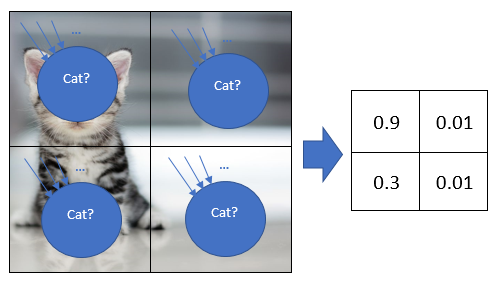

A convolution is a filter that passes over an image, processes it, and extracts features that show a commonality in the image. In this lab you'll see how they work, by processing an image to see if you can extract features from it! The process is very simple. You simply scan every pixel in the image and then look at its neighboring pixels. You multiply out the values of these pixels by the equivalent weights in a filter.

In other words, Convolution is a mathematical operation between two functions producing a third convoluted function that is a modefied version of the first function. In the case of image processing, it’s the process of multiplying each element of matrix with its local neighbors, weighted by the kernel (or filter). For example, given a maxtrix M and kernel c as follow:
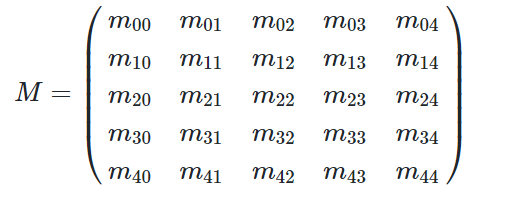

<br/>
and
<br/>


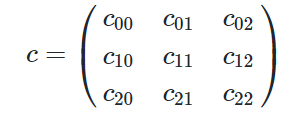

The discrete convolution operation is defined as
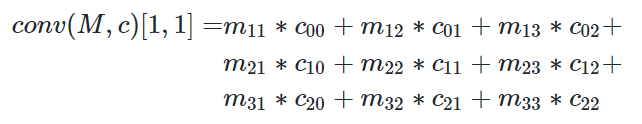


<br/>

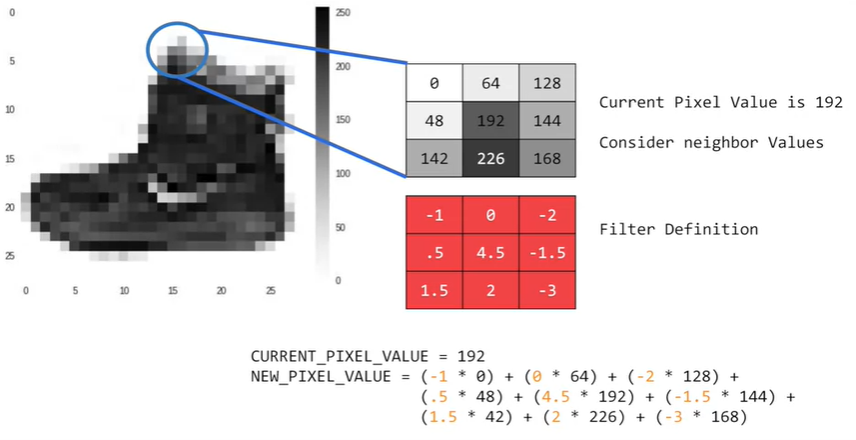

So, for example, in this case,our pixel has the value 192,and its upper left neighbor has the value zero.The upper left value and the filter is negative one,so we multiply zero by negative one.Then we would do the same for the upper neighbor.Its value is 64 and the corresponding filter value was zero,so we’d multiply those out.Repeat this for each neighbor and each corresponding filter value,and would then have the new pixel with the sum of each of the neighbor values multiplied by the corresponding filter value,and that’s a convolution.


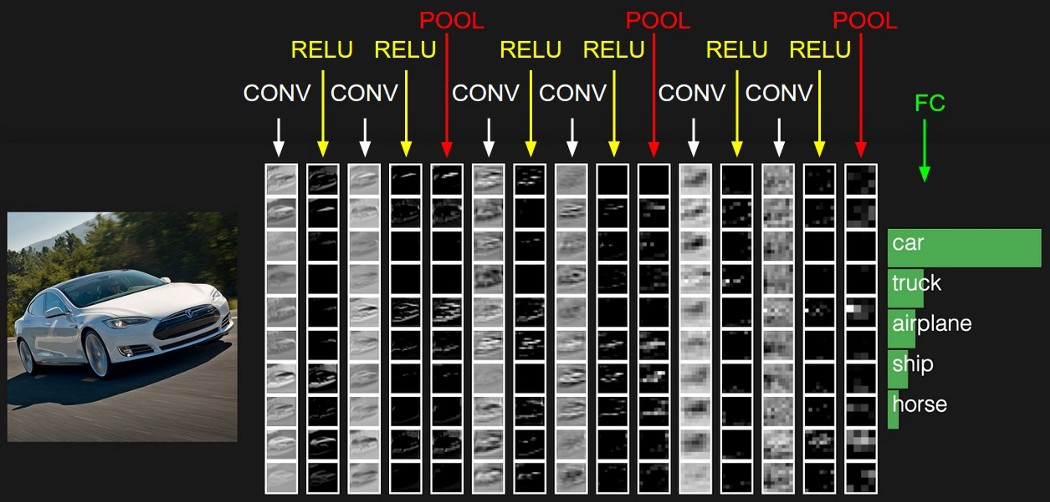

### Understand Convolutions

An image is composed of an array of pixels with height and width. A grayscale image has only one channel while the color image has three channels (each one for Red, Green, and Blue). Let's have a look of this gray scale image stored in the MNIST dataset. The picture below shows how to represent the picture of the left in a matrix format. Note that, the original matrix has been standardized to be between 0 and 1. For darker color, the value in the matrix is about 0.9 while white pixels have a value of 0.

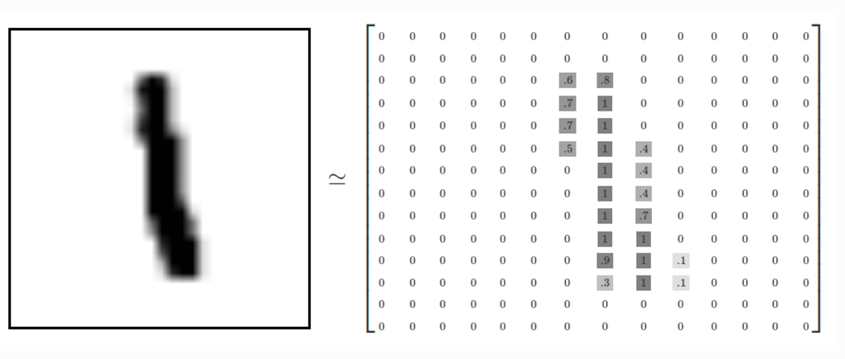

The most critical component in the model is the convolutional layer. This part aims at reducing the size of the image for faster computations of the weights and improve its generalization.

During the convolutional part, the network keeps the essential features of the image and excludes irrelevant noise. 



The purpose of the convolution is to extract the features of the object on the image locally. It means the network will learn specific patterns within the picture and will be able to recognize it everywhere in the picture.

Convolution is an element-wise multiplication. The concept is easy to understand. The computer will scan a part of the image, usually with a dimension of 3x3 and multiplies it to a filter. The output of the element-wise multiplication is called a feature map. This step is repeated until all the image is scanned. Note that, after the convolution, the size of the image is reduced.

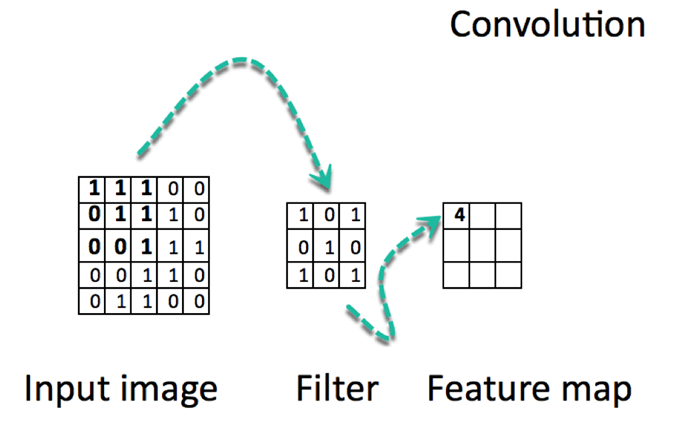

And here is how convolution works.

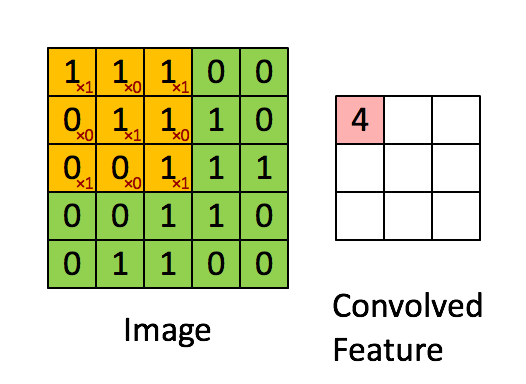

There are numerous channels available. Below, we listed some of the channels. You can see that each filter has a specific purpose. Note, in the picture below; the Kernel is a synonym of the filter.

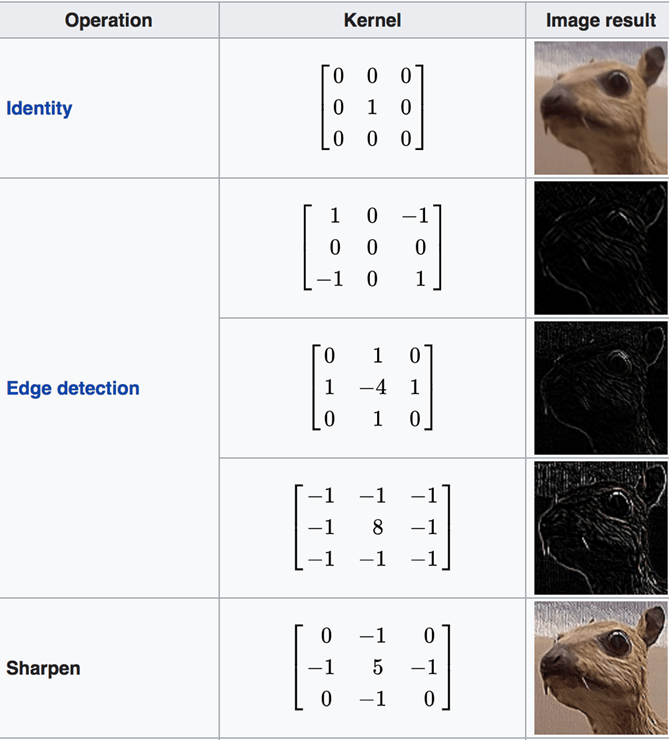

The convolutional phase will apply the filter on a small array of pixels within the picture. The filter will move along the input image with a general shape of 3x3 or 5x5. It means the network will slide these windows across all the input image and compute the convolution. The image below shows how the convolution operates. The size of the patch is 3x3, and the output matrix is the result of the element-wise operation between the image matrix and the filter.

You notice that the width and height of the output can be different from the width and height of the input. It happens because of the border effect.

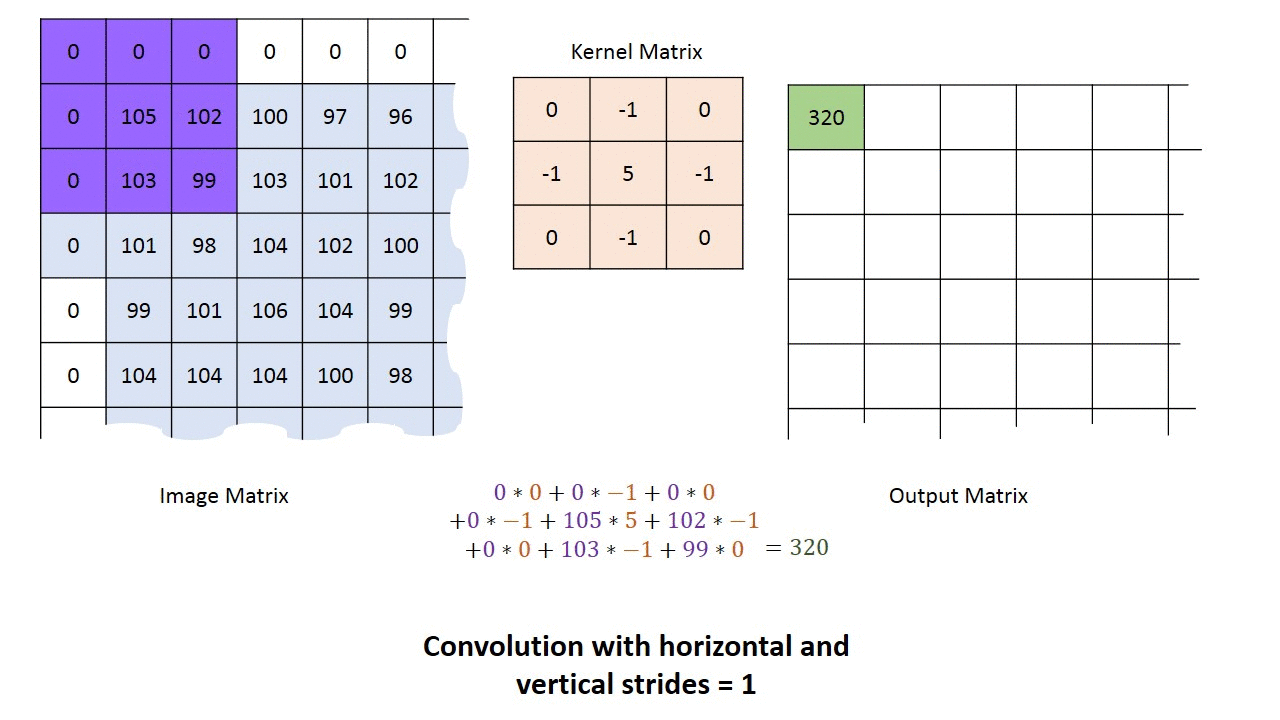

### Maxpooling Operation

This step is easy to understand. The purpose of the pooling is to reduce the dimensionality of the input image. The steps are done to reduce the computational complexity of the operation. By diminishing the dimensionality, the network has lower weights to compute, so it prevents overfitting.

In this stage, you need to define the size and the stride. A standard way to pool the input image is to use the maximum value of the feature map. Look at the picture below. The "pooling" will screen a four submatrix of the 4x4 feature map and return the maximum value. The pooling takes the maximum value of a 2x2 array and then move this windows by two pixels. For instance, the first sub-matrix is [3,1,3,2], the pooling will return the maximum, which is 3.

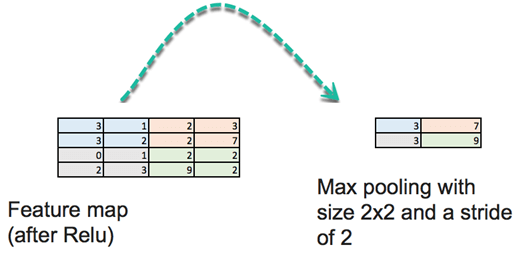

##  👉🏻 Task 3: Draw the Image, Store it and Apply Convolutions.

### Drawing

Let's explore how convolutions work by creating a basic convolution on a 2D Grey Scale image. First we can load the image by taking the 'ascent' image from scipy library. It's a nice, built-in picture with lots of angles and lines. 
In this project, you will get a soft introduction to what Convolution Neural Networks is, and how they offer you a new programming paradigm, giving you a new set of tools to open new scenarios.<br/>
All you need to know is some basic programming skills, and you'll pick the rest up as you go along.... ✨

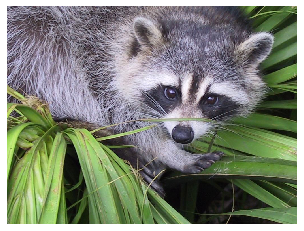

In [1]:
#Let's view the original colored image
import numpy as np
from scipy import misc
i = misc.face(gray=False)
import matplotlib.pyplot as plt
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(i)
plt.show()

In [2]:
import numpy as np
from scipy import misc
i = misc.face(gray=True)

Next, we can use the pyplot library to draw the image so we know what it looks like.

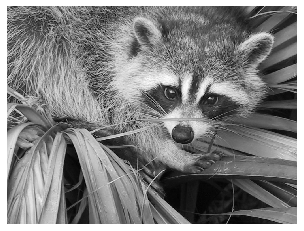

In [3]:
import matplotlib.pyplot as plt
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(i)
plt.show()

In [4]:
i.shape

(768, 1024)

### Storing
The image is stored as a numpy array, so we can create the transformed image by just copying that array. <br/>

In [104]:
i_transformed = np.copy(i)

Now we can create a filter as a 3x3 array. 
This filter 👇🏻 detects edges nicely, it creates a convolution that only passes through sharp edges and straight lines.
(Experiment with different values for fun effects.
filter = [ [0, 1, 0], [1, -4, 1], [0, 1, 0]]
🎈)

In [105]:
# A couple more filters to try for fun!
filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]
weight  = 1

If all the digits in the filter don't add up to 0 or 1, you 
should probably do a weight to get it to do so.

so, for example, if your weights are 1,1,1 1,2,1 1,1,1
They add up to 10, so you would set a weight of 1 if you want to normalize them 👆🏻


Now let's create a convolution. We will iterate over the image, leaving a 1 pixel margin, and multiply out each of the neighbors of the current pixel by the value defined in the filter. 

i.e. the current pixel's neighbor above it and to the left will be multiplied by the top left item in the filter etc. etc. We'll then multiply the result by the weight, and then ensure the result is in the range 0-255

Finally we'll load the new value into the transformed image. 

In [106]:
size_x = i_transformed.shape[0]
size_y = i_transformed.shape[1]

for x in range(1,size_x-1):
  for y in range(1,size_y-1):
      convolution = 0.0
      convolution = convolution + (i[x - 1, y-1] * filter[0][0])
      convolution = convolution + (i[x, y-1] * filter[0][1])
      convolution = convolution + (i[x + 1, y-1] * filter[0][2])
      convolution = convolution + (i[x-1, y] * filter[1][0])
      convolution = convolution + (i[x, y] * filter[1][1])
      convolution = convolution + (i[x+1, y] * filter[1][2])
      convolution = convolution + (i[x-1, y+1] * filter[2][0])
      convolution = convolution + (i[x, y+1] * filter[2][1])
      convolution = convolution + (i[x+1, y+1] * filter[2][2])
      convolution = convolution * weight
      if(convolution<0):
        convolution=0
      if(convolution>255):
        convolution=255
      i_transformed[x, y] = convolution

### Effects Of The Convolution
Now we can plot the image to see the effect of the convolution! <br/>
Plot the image.<br/>
They are 512 by 512

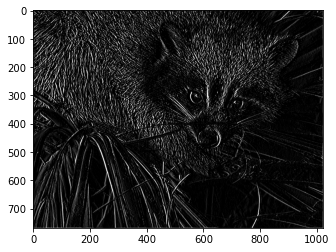

In [107]:
plt.gray()
plt.grid(False)
plt.imshow(i_transformed)
plt.show()   

This code will show a (2, 2) pooling. <br/>
Here we will iterate over the image, and look at the pixel and it's immediate neighbors to the right, beneath, and right-beneath. Take the largest of them and load it into the new image. Thus the new image will be 1/4 the size of the old -- with the dimensions on X and Y being halved by this process. <br/>
You'll see that the features get maintained despite this compression!

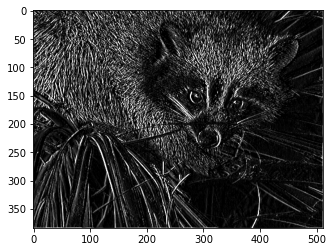

In [108]:
new_x = int(size_x/2)
new_y = int(size_y/2)
newImage = np.zeros((new_x, new_y))
for x in range(0, size_x, 2):
  for y in range(0, size_y, 2):
    pixels = []
    pixels.append(i_transformed[x, y])
    pixels.append(i_transformed[x+1, y])
    pixels.append(i_transformed[x, y+1])
    pixels.append(i_transformed[x+1, y+1])
    newImage[int(x/2),int(y/2)] = max(pixels)

# Plot the image. now 256 pixels instead of 512
plt.gray()
plt.grid(False)
plt.imshow(newImage)
plt.show()      
    
    

## 👉🏻 Task 4: Create Visualized filters and Convolutions.

Let's start by importing some Python libraries and get the ascent picture.

In [109]:
%matplotlib inline  
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import tensorflow as tf
from PIL import Image
import numpy

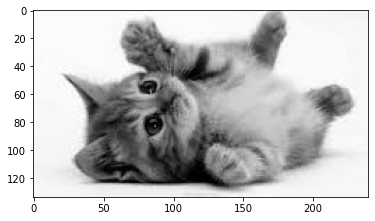

In [110]:
img = Image.open('gray_kitten.jpg')
plt.imshow(img)

And in order to visualize the result of each operation, we need to write some utils functions

In [111]:
def show_image_ops_gray(img, conv_op, sigmoid_op, avg_pool_op, max_pool_op):
    gs1 = gridspec.GridSpec(1, 5)
    plt.subplot(gs1[0, 0]); plt.axis('off'); plt.imshow(img[:, :], cmap=plt.get_cmap('gray'))
    plt.subplot(gs1[0, 1]); plt.axis('off'); plt.imshow(conv_op[0, :, :, 0], cmap=plt.get_cmap('gray'))
    plt.subplot(gs1[0, 2]); plt.axis('off'); plt.imshow(sigmoid_op[0, :, :, 0], cmap=plt.get_cmap('gray'))
    plt.subplot(gs1[0, 3]); plt.axis('off'); plt.imshow(avg_pool_op[0, :, :, 0], cmap=plt.get_cmap('gray'))
    plt.subplot(gs1[0, 4]); plt.axis('off'); plt.imshow(max_pool_op[0, :, :, 0], cmap=plt.get_cmap('gray'))
    plt.show()
            
    
def show_image_ops_rgb(img, conv_op, sigmoid_op, avg_pool_op, max_pool_op):
    gs1 = gridspec.GridSpec(1, 5)
    plt.subplot(gs1[0, 0]); plt.axis('off'); plt.imshow(img[:, :, :])
    plt.subplot(gs1[0, 1]); plt.axis('off'); plt.imshow(conv_op[0, :, :, :])
    plt.subplot(gs1[0, 2]); plt.axis('off'); plt.imshow(sigmoid_op[0, :, :, :])
    plt.subplot(gs1[0, 3]); plt.axis('off'); plt.imshow(avg_pool_op[0, :, :, :])
    plt.subplot(gs1[0, 4]); plt.axis('off'); plt.imshow(max_pool_op[0, :, :, :])
    plt.show()

def show_shapes(img, conv_op, sigmoid_op, avg_pool_op, max_pool_op):
    print("""
        image filters (shape {})
        conv_op filters (shape {})
        sigmoid_op filters (shape {})
        avg_pool_op filters (shape {})
        max_pool_op filters (shape {})
        """.format(
            img.shape, conv_op.shape, sigmoid_op.shape, avg_pool_op.shape, max_pool_op.shape))

Now that we have a way to visualize every step, let’s create the tensorflow operations

In [112]:
def convolve(img, kernel, strides=[1, 3, 3, 1], pooling=[1, 3, 3, 1], padding='SAME', rgb=True):
    with tf.Graph().as_default():
        num_maps = 3
        if not rgb:
            num_maps = 1  # set number of maps to 1
            img = img.convert('L', (0.2989, 0.5870, 0.1140, 0))  # convert to gray scale
        
        
        # reshape image to have a leading 1 dimension
        img = numpy.asarray(img, dtype='float32') / 256.
        img_shape = img.shape
        img_reshaped = img.reshape(1, img_shape[0], img_shape[1], num_maps)
        
        x = tf.placeholder('float32', [1, None, None, num_maps])
        w = tf.get_variable('w', initializer=tf.to_float(kernel))
        
        # operations
        conv = tf.nn.conv2d(x, w, strides=strides, padding=padding)
        sig = tf.sigmoid(conv)
        max_pool = tf.nn.max_pool(sig, ksize=[1, 3, 3, 1], strides=[1, 3, 3, 1], padding=padding)
        avg_pool = tf.nn.avg_pool(sig, ksize=[1, 3, 3, 1], strides=[1, 3, 3, 1], padding=padding)
        
        init = tf.initialize_all_variables()
        with tf.Session() as session:
            session.run(init)
            conv_op, sigmoid_op, avg_pool_op, max_pool_op = session.run([conv, sig, avg_pool, max_pool],
                                                                        feed_dict={x: img_reshaped})
            
        show_shapes(img, conv_op, sigmoid_op, avg_pool_op, max_pool_op)
        if rgb:
            show_image_ops_rgb(img, conv_op, sigmoid_op, avg_pool_op, max_pool_op)
        else:
            show_image_ops_gray(img, conv_op, sigmoid_op, avg_pool_op, max_pool_op)

The convolve function that we just built 👆🏻, will allow us to try some filters🤩. So let's try some of them here 👇🏻


        image filters (shape (134, 240))
        conv_op filters (shape (1, 45, 80, 1))
        sigmoid_op filters (shape (1, 45, 80, 1))
        avg_pool_op filters (shape (1, 15, 27, 1))
        max_pool_op filters (shape (1, 15, 27, 1))
        


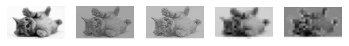


        image filters (shape (134, 240, 3))
        conv_op filters (shape (1, 45, 80, 3))
        sigmoid_op filters (shape (1, 45, 80, 3))
        avg_pool_op filters (shape (1, 15, 27, 3))
        max_pool_op filters (shape (1, 15, 27, 3))
        


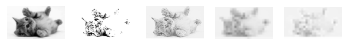

In [113]:
# sharpen
a = np.zeros([3, 3, 1, 1])
a[1, 1, :, :] = 5
a[0, 1, :, :] = -1
a[1, 0, :, :] = -1
a[2, 1, :, :] = -1
a[1, 2, :, :] = -1
convolve(img, a, rgb=False)

# sharpen rgb
a = np.zeros([3, 3, 3, 3])
a[1, 1, :, :] = 5
a[0, 1, :, :] = -1
a[1, 0, :, :] = -1
a[2, 1, :, :] = -1
a[1, 2, :, :] = -1
convolve(img, a)


        image filters (shape (134, 240))
        conv_op filters (shape (1, 45, 80, 1))
        sigmoid_op filters (shape (1, 45, 80, 1))
        avg_pool_op filters (shape (1, 15, 27, 1))
        max_pool_op filters (shape (1, 15, 27, 1))
        


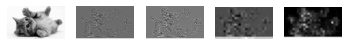

In [114]:
# outline
a = np.zeros([3, 3, 1, 1])
a[:, :, :, :] = -1
a[1, 1, :, :] = 8
convolve(img, a, rgb=False)


        image filters (shape (134, 240))
        conv_op filters (shape (1, 45, 80, 1))
        sigmoid_op filters (shape (1, 45, 80, 1))
        avg_pool_op filters (shape (1, 15, 27, 1))
        max_pool_op filters (shape (1, 15, 27, 1))
        


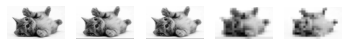


        image filters (shape (134, 240, 3))
        conv_op filters (shape (1, 45, 80, 3))
        sigmoid_op filters (shape (1, 45, 80, 3))
        avg_pool_op filters (shape (1, 15, 27, 3))
        max_pool_op filters (shape (1, 15, 27, 3))
        


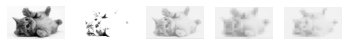

In [115]:
# blure
a = np.zeros([3, 3, 1, 1])
a[1, 1, :, :] = 0.25
a[0, 1, :, :] = 0.125
a[1, 0, :, :] = 0.125
a[2, 1, :, :] = 0.125
a[1, 2, :, :] = 0.125
a[0, 0, :, :] = 0.0625
a[0, 2, :, :] = 0.0625
a[2, 0, :, :] = 0.0625
a[2, 2, :, :] = 0.0625
convolve(img, a, rgb=False)

# blure
a = np.zeros([3, 3, 3, 3])
a[1, 1, :, :] = 0.25
a[0, 1, :, :] = 0.125
a[1, 0, :, :] = 0.125
a[2, 1, :, :] = 0.125
a[1, 2, :, :] = 0.125
a[0, 0, :, :] = 0.0625
a[0, 2, :, :] = 0.0625
a[2, 0, :, :] = 0.0625
a[2, 2, :, :] = 0.0625
convolve(img, a)


        image filters (shape (134, 240))
        conv_op filters (shape (1, 45, 80, 1))
        sigmoid_op filters (shape (1, 45, 80, 1))
        avg_pool_op filters (shape (1, 15, 27, 1))
        max_pool_op filters (shape (1, 15, 27, 1))
        


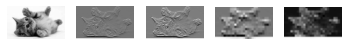

In [116]:
# darken
a = np.zeros([3, 3, 1, 1])
a[0, :, :, :] = 1
a[0, 1, :, :] = 2
a[2, :, :, :] = -1
a[2, 1, :, :] = -2
convolve(img, a, rgb=False)

Let's start by importing some Python libraries and get the ascent picture.

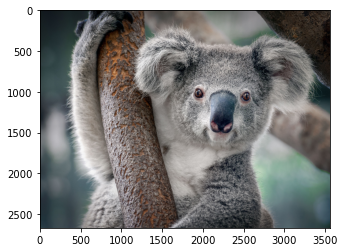

In [117]:
%matplotlib inline  
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import tensorflow as tf
from PIL import Image
import numpy

img = Image.open('koala.png')
plt.imshow(img)

In [118]:
def show_image_ops_gray(img, conv_op, sigmoid_op, avg_pool_op, max_pool_op):
    gs1 = gridspec.GridSpec(1, 5)
    plt.subplot(gs1[0, 0]); plt.axis('off'); plt.imshow(img[:, :], cmap=plt.get_cmap('gray'))
    plt.subplot(gs1[0, 1]); plt.axis('off'); plt.imshow(conv_op[0, :, :, 0], cmap=plt.get_cmap('gray'))
    plt.subplot(gs1[0, 2]); plt.axis('off'); plt.imshow(sigmoid_op[0, :, :, 0], cmap=plt.get_cmap('gray'))
    plt.subplot(gs1[0, 3]); plt.axis('off'); plt.imshow(avg_pool_op[0, :, :, 0], cmap=plt.get_cmap('gray'))
    plt.subplot(gs1[0, 4]); plt.axis('off'); plt.imshow(max_pool_op[0, :, :, 0], cmap=plt.get_cmap('gray'))
    plt.show()
            
    
def show_image_ops_rgb(img, conv_op, sigmoid_op, avg_pool_op, max_pool_op):
    gs1 = gridspec.GridSpec(1, 5)
    plt.subplot(gs1[0, 0]); plt.axis('off'); plt.imshow(img[:, :, :])
    plt.subplot(gs1[0, 1]); plt.axis('off'); plt.imshow(conv_op[0, :, :, :])
    plt.subplot(gs1[0, 2]); plt.axis('off'); plt.imshow(sigmoid_op[0, :, :, :])
    plt.subplot(gs1[0, 3]); plt.axis('off'); plt.imshow(avg_pool_op[0, :, :, :])
    plt.subplot(gs1[0, 4]); plt.axis('off'); plt.imshow(max_pool_op[0, :, :, :])
    plt.show()

def show_shapes(img, conv_op, sigmoid_op, avg_pool_op, max_pool_op):
    print("""
        image filters (shape {})
        conv_op filters (shape {})
        sigmoid_op filters (shape {})
        avg_pool_op filters (shape {})
        max_pool_op filters (shape {})
        """.format(
            img.shape, conv_op.shape, sigmoid_op.shape, avg_pool_op.shape, max_pool_op.shape))

In [119]:
def convolve(img, kernel, strides=[1, 3, 3, 1], pooling=[1, 3, 3, 1], padding='SAME', rgb=True):
    with tf.Graph().as_default():
        num_maps = 3
        if not rgb:
            num_maps = 1  # set number of maps to 1
            img = img.convert('L', (0.2989, 0.5870, 0.1140, 0))  # convert to gray scale
        
        
        # reshape image to have a leading 1 dimension
        img = numpy.asarray(img, dtype='float32') / 256.
        img_shape = img.shape
        img_reshaped = img.reshape(1, img_shape[0], img_shape[1], num_maps)
        
        x = tf.placeholder('float32', [1, None, None, num_maps])
        w = tf.get_variable('w', initializer=tf.to_float(kernel))
        
        # operations
        conv = tf.nn.conv2d(x, w, strides=strides, padding=padding)
        sig = tf.sigmoid(conv)
        max_pool = tf.nn.max_pool(sig, ksize=[1, 3, 3, 1], strides=[1, 3, 3, 1], padding=padding)
        avg_pool = tf.nn.avg_pool(sig, ksize=[1, 3, 3, 1], strides=[1, 3, 3, 1], padding=padding)
        
        init = tf.initialize_all_variables()
        with tf.Session() as session:
            session.run(init)
            conv_op, sigmoid_op, avg_pool_op, max_pool_op = session.run([conv, sig, avg_pool, max_pool],
                                                                        feed_dict={x: img_reshaped})
            
        show_shapes(img, conv_op, sigmoid_op, avg_pool_op, max_pool_op)
        if rgb:
            show_image_ops_rgb(img, conv_op, sigmoid_op, avg_pool_op, max_pool_op)
        else:
            show_image_ops_gray(img, conv_op, sigmoid_op, avg_pool_op, max_pool_op)


        image filters (shape (2667, 3556))
        conv_op filters (shape (1, 889, 1186, 1))
        sigmoid_op filters (shape (1, 889, 1186, 1))
        avg_pool_op filters (shape (1, 297, 396, 1))
        max_pool_op filters (shape (1, 297, 396, 1))
        


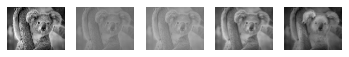


        image filters (shape (2667, 3556, 3))
        conv_op filters (shape (1, 889, 1186, 3))
        sigmoid_op filters (shape (1, 889, 1186, 3))
        avg_pool_op filters (shape (1, 297, 396, 3))
        max_pool_op filters (shape (1, 297, 396, 3))
        


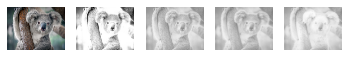

In [120]:
# sharpen
a = np.zeros([3, 3, 1, 1])
a[1, 1, :, :] = 5
a[0, 1, :, :] = -1
a[1, 0, :, :] = -1
a[2, 1, :, :] = -1
a[1, 2, :, :] = -1
convolve(img, a, rgb=False)

# sharpen rgb
a = np.zeros([3, 3, 3, 3])
a[1, 1, :, :] = 5
a[0, 1, :, :] = -1
a[1, 0, :, :] = -1
a[2, 1, :, :] = -1
a[1, 2, :, :] = -1
convolve(img, a)

## 👉🏻 Task 5: Apply Convolutions and Pooling to Images

In [152]:
import cv2
import numpy as np
from scipy import misc
i = misc.ascent()

Let's now try to apply convolutions on a new image and play with filters!

Now, let's use the `pyplot` library to draw the image so we know what it looks like.

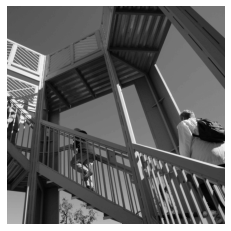

In [153]:
import matplotlib.pyplot as plt
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(i)
plt.show()

We can see that this is an image of a stairwell. There are lots of features in here that we can play with seeing if we can isolate them -- for example there are strong vertical lines.

The image is stored as a numpy array, so we can create the transformed image by just copying that array. Let's also get the dimensions of the image so we can loop over it later.

In [154]:
i_transformed = np.copy(i)
size_x = i_transformed.shape[0]
size_y = i_transformed.shape[1]

### Creating the Convolution

First, we make a convolution matrix (or kernel) as a 3x3 array.

In [155]:
# This filter detects edges nicely
# It creates a convolution that only passes through sharp edges and straight lines. 
# Experiment with different values for fun effects.
#filter = [ [0, 1, 0], [1, -4, 1], [0, 1, 0]] 
# A couple more filters to try for fun!
filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]
#filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]
 # If all the digits in the filter don't add up to 0 or 1, you 
# should probably do a weight to get it to do so
# so, for example, if your weights are 1,1,1 1,2,1 1,1,1
# They add up to 10, so you would set a weight of .1 if you want to normalize them
weight  = 1

Now let's calculate the output pixels. We will iterate over the image, leaving a 1 pixel margin, and multiply out each of the neighbors of the current pixel by the value defined in the filter.

That means the current pixel's neighbor above it and to the left will be multiplied by the top left item in the filter etc. etc. We'll then multiply the result by the weight, and then ensure the result is in the range 0-255

Finally we'll load the new value into the transformed image.

In [157]:
for x in range(1,size_x-1):
  for y in range(1,size_y-1):
      output_pixel = 0.0
      output_pixel = output_pixel + (i[x - 1, y-1] * filter[0][0])
      output_pixel = output_pixel + (i[x, y-1] * filter[0][1])
      output_pixel = output_pixel + (i[x + 1, y-1] * filter[0][2])
      output_pixel = output_pixel + (i[x-1, y] * filter[1][0])
      output_pixel = output_pixel + (i[x, y] * filter[1][1])
      output_pixel = output_pixel + (i[x+1, y] * filter[1][2])
      output_pixel = output_pixel + (i[x-1, y+1] * filter[2][0])
      output_pixel = output_pixel + (i[x, y+1] * filter[2][1])
      output_pixel = output_pixel + (i[x+1, y+1] * filter[2][2])
      output_pixel = output_pixel * weight
      if(output_pixel<0):
        output_pixel=0
      if(output_pixel>255):
        output_pixel=255
      i_transformed[x, y] = output_pixel

### Examine the Results
Now we can plot the image to see the effect of passing this filter over it!

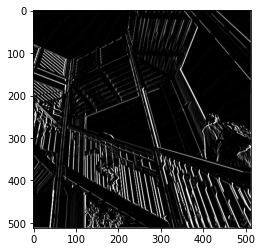

In [158]:
# Plot the image. Note the size of the axes -- they are 512 by 512
plt.gray()
plt.grid(False)
plt.imshow(i_transformed)
#plt.axis('off')
plt.show()   

### Play with filters!

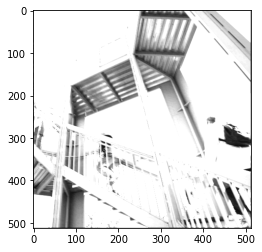

In [159]:
for x in range(1,size_x-1):
  for y in range(1,size_y-1):
      output_pixel = 0.0
      output_pixel = output_pixel + (i[x - 1, y-1] * filter[2][1])
      output_pixel = output_pixel + (i[x, y-1] * filter[1][0])
      output_pixel = output_pixel + (i[x + 1, y-1] * filter[1][2])
      output_pixel = output_pixel + (i[x-1, y] * filter[0][1])
      output_pixel = output_pixel + (i[x, y] * filter[2][0])
      output_pixel = output_pixel + (i[x+1, y] * filter[0][2])
      output_pixel = output_pixel + (i[x-1, y+1] * filter[2][1])
      output_pixel = output_pixel + (i[x, y+1] * filter[2][0])
      output_pixel = output_pixel + (i[x+1, y+1] * filter[2][2])
      output_pixel = output_pixel * weight
      if(output_pixel<0):
        output_pixel=0
      if(output_pixel>255):
        output_pixel=255
      i_transformed[x, y] = output_pixel

# Plot the image. Note the size of the axes -- they are 512 by 512
plt.gray()
plt.grid(False)
plt.imshow(i_transformed)
#plt.axis('off')
plt.show()   

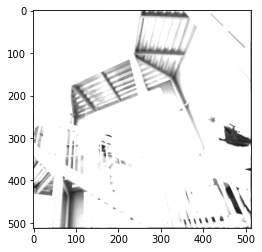

In [160]:
for x in range(1,size_x-1):
  for y in range(1,size_y-1):
      output_pixel = 0.0
      output_pixel = output_pixel + (i[x - 1, y-1] * filter[2][0])
      output_pixel = output_pixel + (i[x, y-1] * filter[1][2])
      output_pixel = output_pixel + (i[x + 1, y-1] * filter[2][1])
      output_pixel = output_pixel + (i[x-1, y] * filter[1][0])
      output_pixel = output_pixel + (i[x, y] * filter[0][1])
      output_pixel = output_pixel + (i[x+1, y] * filter[1][2])
      output_pixel = output_pixel + (i[x-1, y+1] * filter[2][0])
      output_pixel = output_pixel + (i[x, y+1] * filter[2][1])
      output_pixel = output_pixel + (i[x+1, y+1] * filter[2][1])
      output_pixel = output_pixel * weight
      if(output_pixel<0):
        output_pixel=0
      if(output_pixel>255):
        output_pixel=255
      i_transformed[x, y] = output_pixel

# Plot the image. Note the size of the axes -- they are 512 by 512
plt.gray()
plt.grid(False)
plt.imshow(i_transformed)
#plt.axis('off')
plt.show()   

### More on Pooling

As well as using convolutions, pooling helps us greatly in detecting features. The goal is to reduce the overall amount of information in an image while maintaining the features that are detected as present.

There are a number of different types of pooling, but for this lab we'll use one called MAX pooling.

The idea here is to iterate over the image, and consider the pixel and its immediate neighbors to the right, beneath, and right-beneath. Take the largest of these (hence the name MAX pooling) of them and load it into the new image. Thus the new image will be 1/4 the size of the old

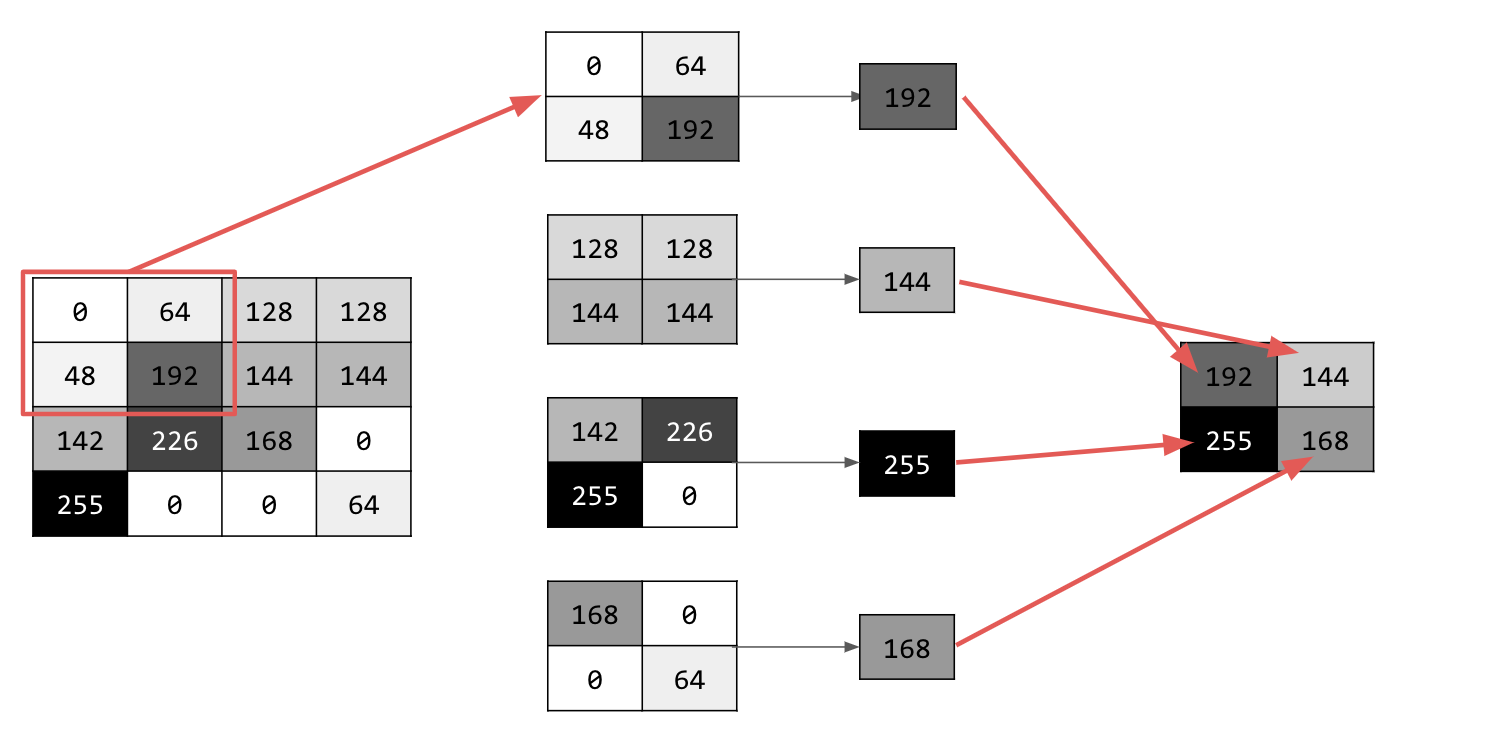

In [161]:
for x in range(1,size_x-1):
  for y in range(1,size_y-1):
      output_pixel = 0.0
      output_pixel = output_pixel + (i[x - 1, y-1] * filter[0][0])
      output_pixel = output_pixel + (i[x, y-1] * filter[0][1])
      output_pixel = output_pixel + (i[x + 1, y-1] * filter[0][2])
      output_pixel = output_pixel + (i[x-1, y] * filter[1][0])
      output_pixel = output_pixel + (i[x, y] * filter[1][1])
      output_pixel = output_pixel + (i[x+1, y] * filter[1][2])
      output_pixel = output_pixel + (i[x-1, y+1] * filter[2][0])
      output_pixel = output_pixel + (i[x, y+1] * filter[2][1])
      output_pixel = output_pixel + (i[x+1, y+1] * filter[2][2])
      output_pixel = output_pixel * weight
      if(output_pixel<0):
        output_pixel=0
      if(output_pixel>255):
        output_pixel=255
      i_transformed[x, y] = output_pixel

This code will show a (2, 2) pooling. Run it to see the output, and you'll see that while the image is 1/4 the size of the original while keeping all the features.

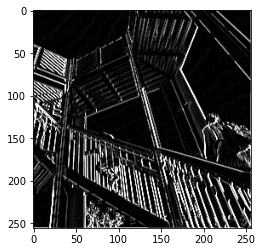

In [162]:
new_x = int(size_x/2)
new_y = int(size_y/2)
newImage = np.zeros((new_x, new_y))
for x in range(0, size_x, 2):
  for y in range(0, size_y, 2):
    pixels = []
    pixels.append(i_transformed[x, y])
    pixels.append(i_transformed[x+1, y])
    pixels.append(i_transformed[x, y+1])
    pixels.append(i_transformed[x+1, y+1])
    pixels.sort(reverse=True)
    newImage[int(x/2),int(y/2)] = pixels[0]
 
# Plot the image. Note the size of the axes -- now 256 pixels instead of 512
plt.gray()
plt.grid(False)
plt.imshow(newImage)
#plt.axis('off')
plt.show()

Note the axes of this plot -- the image is now 256x256, ¼ of it's original size, and the detected features have been enhanced, despite less data now being in the image.

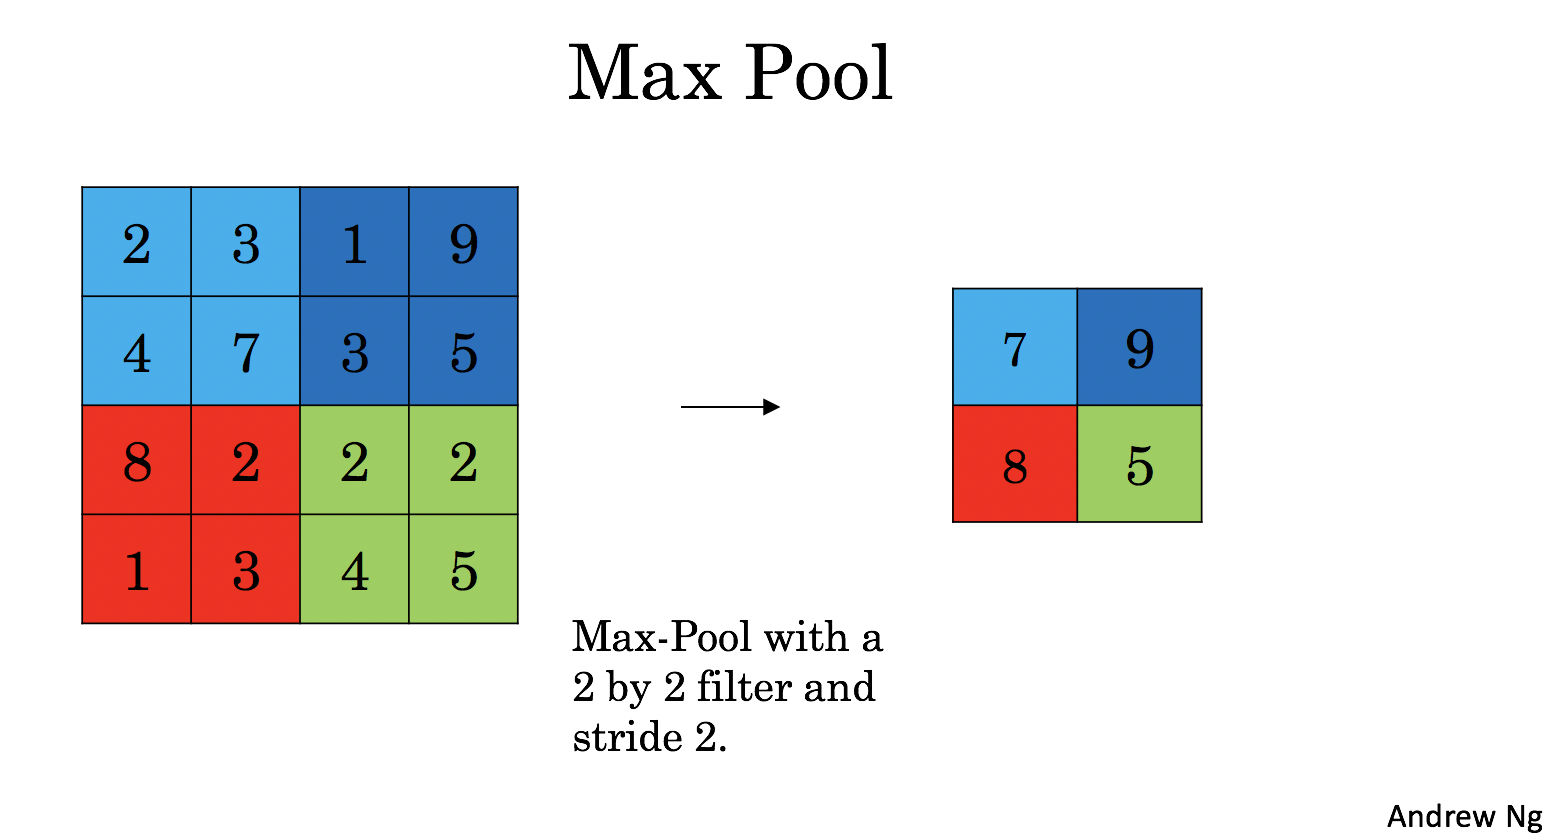

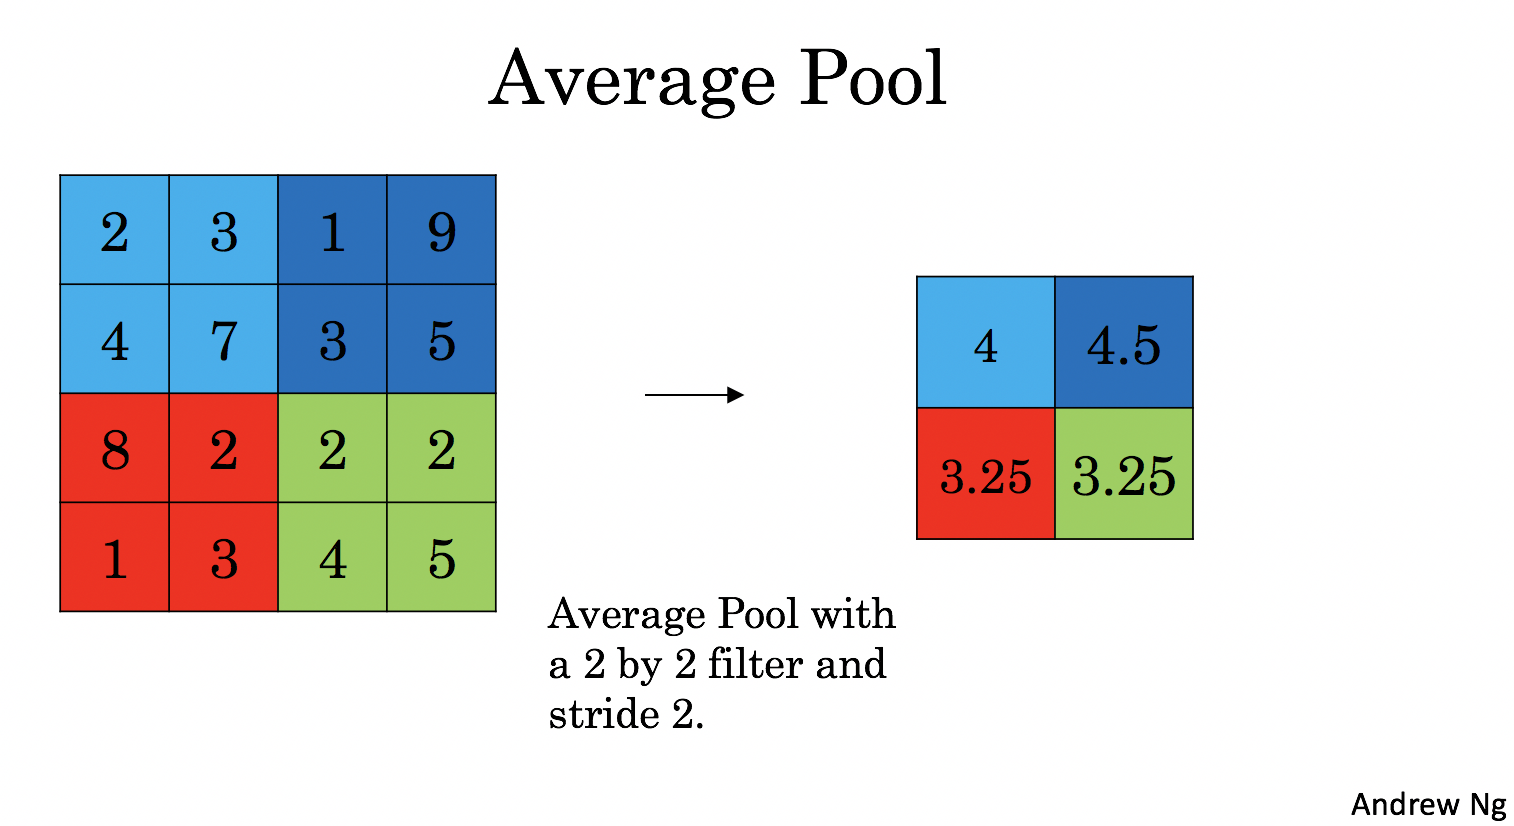

## Bonus: Extra Exercise!

1. Build a neural network that classifies images with CIFAR-10 Dataset.
2. Train this neural network.
3. And, finally, evaluate the accuracy of the model.

import Tensorflow

In [138]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

Download and prepare the CIFAR10 dataset

In [139]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

Verify the Data

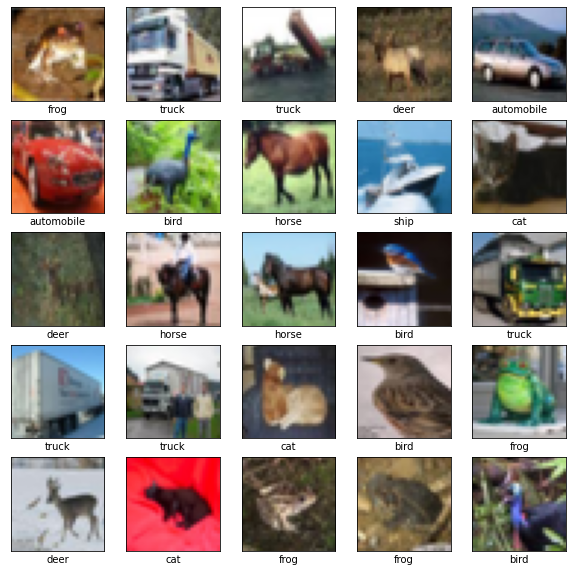

In [140]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

Create the convolutional base

In [141]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


Add Dense layers on top

In [142]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

Compile and Train the Model

In [143]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 75s 1ms/sample - loss: 1.5174 - acc: 0.4469 - val_loss: 1.3194 - val_acc: 0.5220
Epoch 2/10
50000/50000 [==============================] - 62s 1ms/sample - loss: 1.1650 - acc: 0.5850 - val_loss: 1.2004 - val_acc: 0.5784
Epoch 3/10
50000/50000 [==============================] - 60s 1ms/sample - loss: 1.0246 - acc: 0.6397 - val_loss: 1.0060 - val_acc: 0.6463
Epoch 4/10
50000/50000 [==============================] - 65s 1ms/sample - loss: 0.9270 - acc: 0.6717 - val_loss: 1.0320 - val_acc: 0.6379
Epoch 5/10
50000/50000 [==============================] - 69s 1ms/sample - loss: 0.8558 - acc: 0.7012 - val_loss: 0.9482 - val_acc: 0.6725
Epoch 6/10
50000/50000 [==============================] - 71s 1ms/sample - loss: 0.8006 - acc: 0.7215 - val_loss: 0.8983 - val_acc: 0.6871
Epoch 7/10
50000/50000 [==============================] - 65s 1ms/sample - loss: 0.7499 - acc: 0.7382 - val_loss: 0.

Evaluate the Model

10000/10000 - 3s - loss: 0.8771 - acc: 0.7042


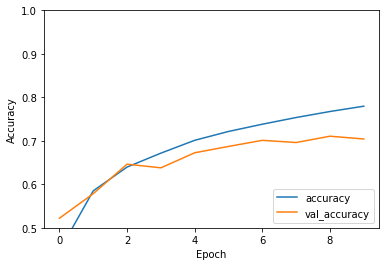

In [149]:
plt.plot(history.history['acc'], label='accuracy')
plt.plot(history.history['val_acc'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [150]:
print(test_acc)

0.7042


# CONGRATULATIONS! 🤭

Back To <a href="Introductions-2.ipynb">Tasks Page. ↩</a>